# Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Loading 

In [2]:
df = pd.read_csv("SummerOlympicmedals.csv", encoding='latin1')

In [3]:
df.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
df.tail(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


## Data Cleaning

In [5]:
print(df.isnull().sum())
df = df.dropna()  # Drop rows with missing values

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [6]:
df['Year'] = df['Year'].astype(int)

In [7]:
df.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


# Visualizations:

## Total Medals by Country

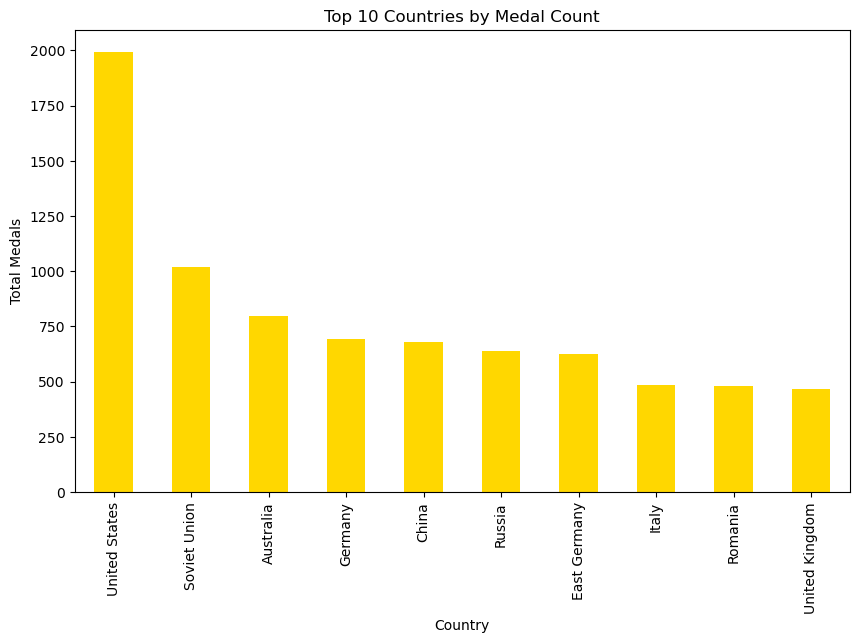

In [8]:
medals_by_country = df.groupby('Country')['Medal'].count().sort_values(ascending=False)
medals_by_country.head(10).plot(kind='bar', color='gold', figsize=(10, 6))
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

Countries like the USA, Russia, and China dominate due to consistent performance across multiple sports and years, reflecting their strong sports infrastructure and investment.

## Medal Trends Over the Years

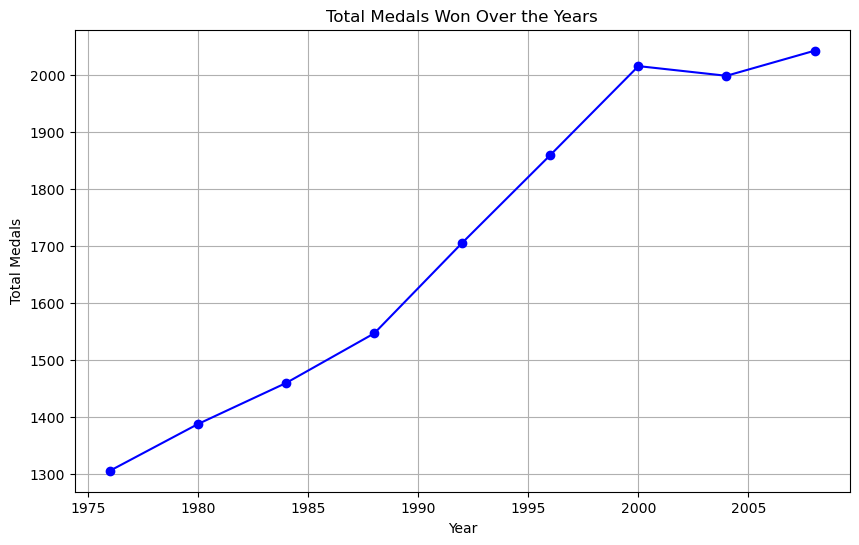

In [9]:
medals_over_years = df.groupby('Year')['Medal'].count()
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values, marker='o', color='blue')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()


A gradual increase in medal count aligns with the inclusion of new events and sports, as well as the growing number of participating nations.

## Gender Distribution

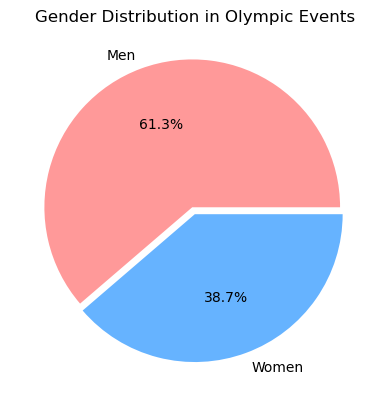

In [10]:
gender_distribution = df['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympic Events")
plt.ylabel('')
plt.show()


While male participation is historically higher, recent years show a closer gender balance due to global efforts for equality in sports.

## Top Athletes by Medals

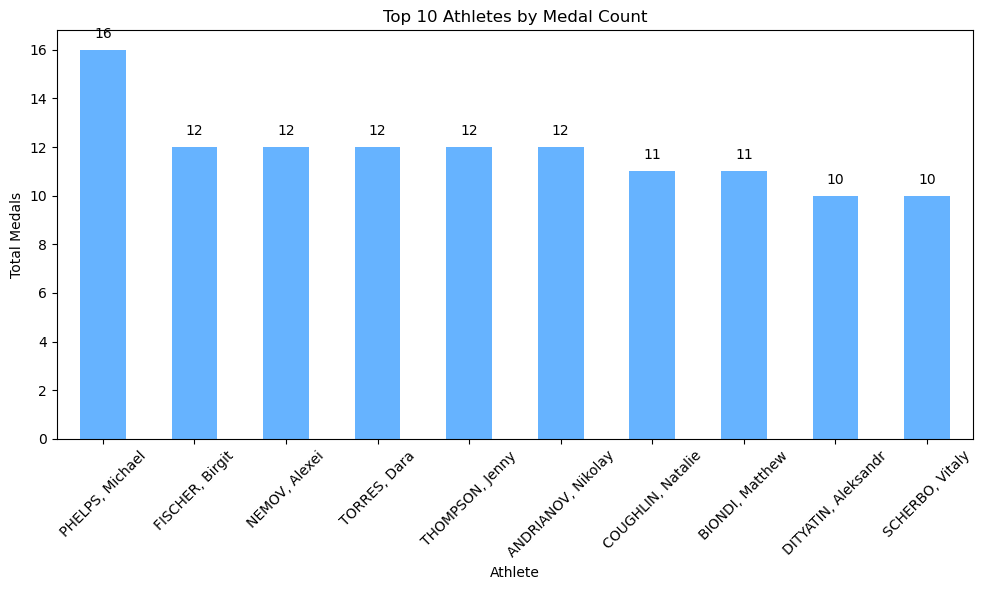

In [11]:
top_athletes = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)

ax = top_athletes.plot(kind='bar', color='#66b3ff', figsize=(10, 6))
for i, value in enumerate(top_athletes):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Athletes such as Michael Phelps stand out for their dominance in specific disciplines, underlining their extraordinary skills and consistency.

## Medals by Sport

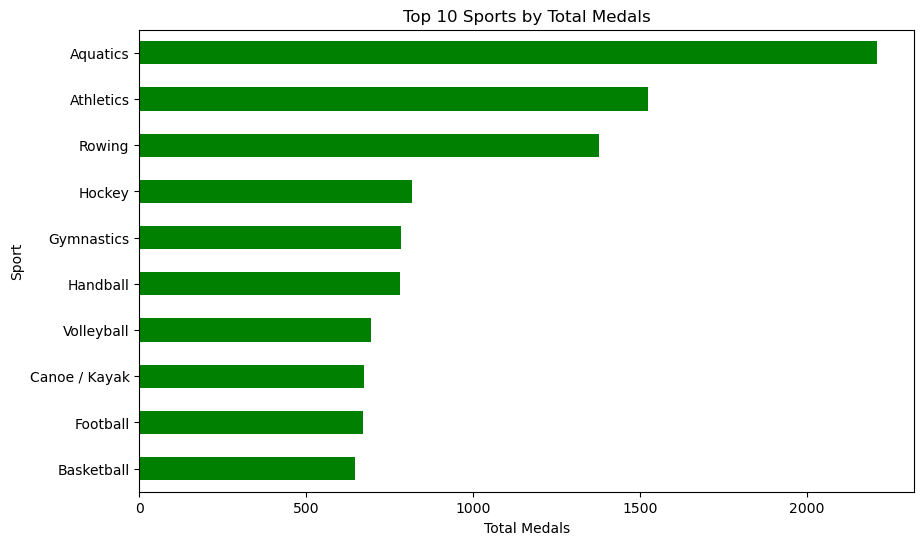

In [14]:
medals_by_sport = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)
medals_by_sport.head(10).plot(kind='barh', color='green', figsize=(10, 6))
plt.title("Top 10 Sports by Total Medals")
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.gca().invert_yaxis()
plt.show()


Athletics and Swimming lead due to their diverse range of events, providing more chances for athletes to win medals.

## Medal Distribution by Year and Country

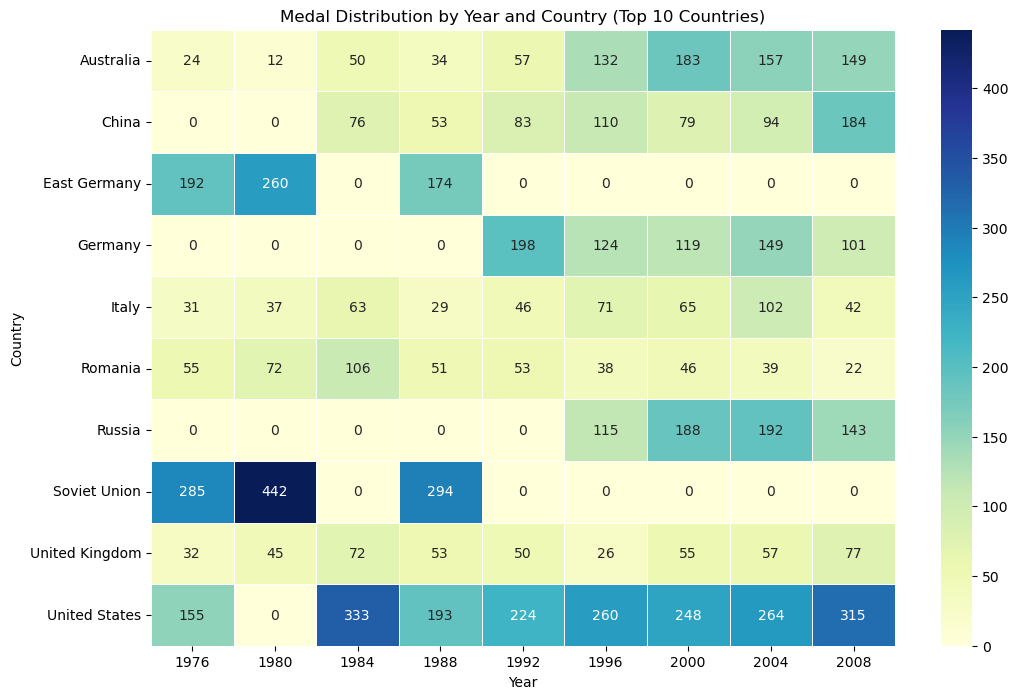

In [15]:
top_countries = df['Country'].value_counts().head(10).index
heatmap_data = df[df['Country'].isin(top_countries)].pivot_table(
    index='Country', columns='Year', values='Medal', aggfunc='count', fill_value=0
)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title("Medal Distribution by Year and Country (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


Heatmaps show periods of dominance by specific nations, such as the USA during early years and China's rise in recent decades.

## Medal Trend of Specific Countries

<Figure size 1200x800 with 0 Axes>

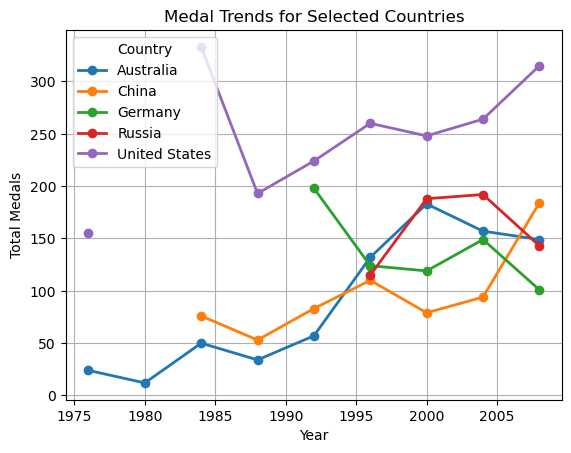

In [23]:
selected_countries = ['United States', 'China', 'Russia', 'Germany', 'Australia']
country_trends = df[df['Country'].isin(selected_countries)].groupby(['Year', 'Country'])['Medal'].count().unstack()

plt.figure(figsize=(12, 8))
country_trends.plot(marker='o', linewidth=2)
plt.title("Medal Trends for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.legend(title="Country")
plt.grid(True)
plt.show()


Nations like the USA and Russia show consistent performance, while others, like China, show a sharp rise post-2000, corresponding with their growing investment in sports.

##  Medal Count by Continent

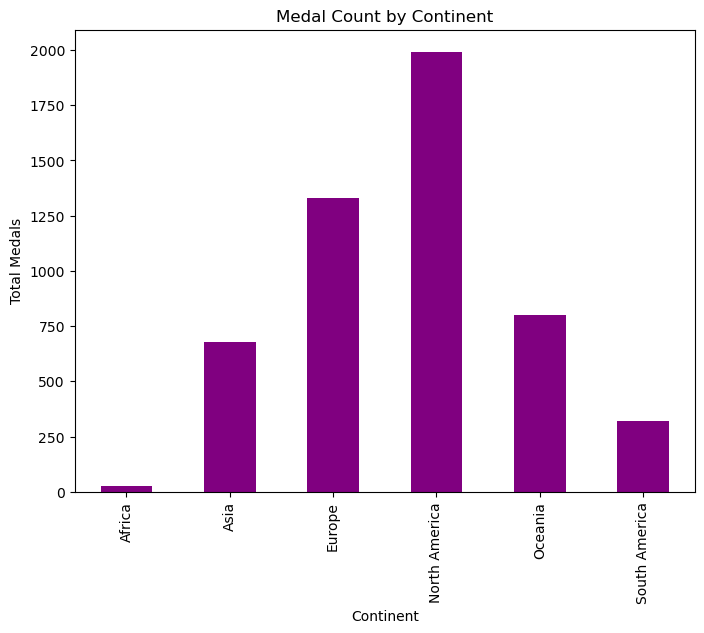

In [21]:
continent_mapping = {
    'United States': 'North America', 'China': 'Asia', 'Russia': 'Europe', 'Germany': 'Europe',
    'Australia': 'Oceania', 'Brazil': 'South America', 'South Africa': 'Africa'
}
df['Continent'] = df['Country'].map(continent_mapping)

continent_medals = df.groupby('Continent')['Medal'].count()
continent_medals.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title("Medal Count by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Medals")
plt.show()


Europe and North America dominate, reflecting their historical engagement with the Olympics and sports funding.

# Conclusion

The analysis of Olympic data reveals significant trends in global sports, highlighting the dominance of countries like the USA, Russia, and China, driven by their robust sports ecosystems. Over time, the steady rise in total medals reflects the expansion of events and increasing participation, showcasing the evolving nature of the Games. Gender distribution indicates progress toward equality, with female representation steadily increasing in recent years. Sports like Athletics and Swimming lead in medal opportunities, emphasizing their central role in the Olympics. These insights underline the impact of infrastructure, investment, and inclusion in shaping a nation’s Olympic success and set benchmarks for aspiring countries to enhance their performance.